In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

def xpercent_scale():
    gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in gca().get_xticks()])

In [3]:
ls

FSV_SF_pval.pdf                 fsv_pval.pdf
Function class probs.ipynb      mmc5.xlsx
Look at rescaling factor.ipynb  mmc6.xlsx
MS_results_43.csv               sample_info_43.csv
SF_select_genes.pdf             seqfish-data-43.pdf
SeqFISH Analysis.ipynb          seqfish-pval-histogram.pdf
SeqFISH Results.ipynb           sigma_pval_SF.pdf
exp_mat_43.csv                  spatial_SeqFISH_analysis.py
final_results_43.csv            top_SF_genes_per_ls.pdf


In [4]:
results = pd.read_csv('final_results_43.csv', index_col=0)
ms_results = pd.read_csv('MS_results_43.csv', index_col=0)
sample_info = pd.read_csv('sample_info_43.csv', index_col=0)

In [5]:
df = pd.read_csv('exp_mat_43.csv', index_col=0)
df.columns = df.columns.map(int)

dfm = np.log10(df + 1)

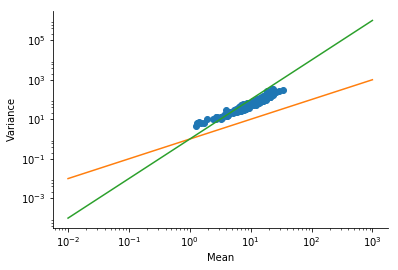

In [6]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

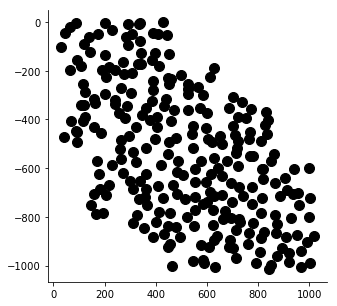

In [7]:
figsize(5, 5)
plt.scatter(sample_info.x, -sample_info.y, s=100, c='k');

In [8]:
from scipy import spatial

In [9]:
tmp = sample_info[['x', 'y']].copy()
tmp['y'] = -tmp['y']
vor = spatial.Voronoi(tmp.values)

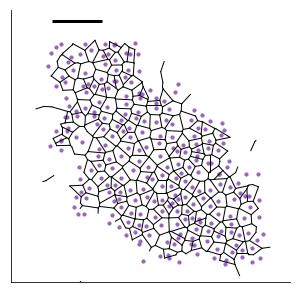

In [10]:
figsize(5, 5)

plt.scatter(*vor.points.T, c='tab:purple', marker='.', s=40)

distances = []
for r in vor.ridge_dict.values():
    xy1 = vor.vertices[r[0]]
    xy2 = vor.vertices[r[1]]
    d = spatial.distance.euclidean(xy1, xy2)
    distances.append(d)
    if d > 80:
        continue

    plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]], c='k', lw=1)
    
x0 = 50
plt.hlines(100, x0, x0 + 229, lw=3);

plt.axis('equal');

plt.ylim(-1100, 150);
plt.xlim(-100, 1100);
plt.xticks([])
plt.yticks([]);

plt.savefig('seqfish-data-43.pdf');

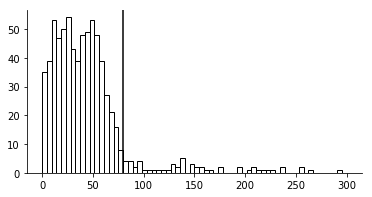

In [11]:
figsize(6, 3)
plt.hist(distances, bins=64, range=[0, 300], fc='none', ec='k');
plt.axvline(80, c='k');

In [12]:
# Length of scalebar
216 / (tmp.x.max() - tmp.x.min()) * 229

49.913218970736629

In [13]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

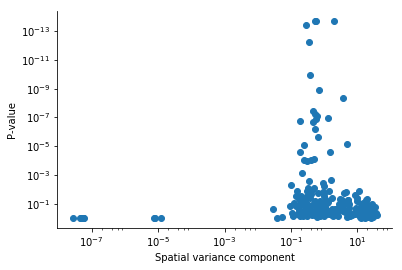

In [14]:
figsize(6, 4)
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

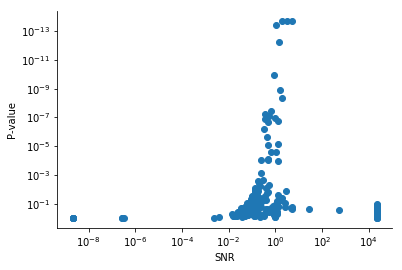

In [15]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('P-value');

In [16]:
results.head().T

,0,1,2,3,4
FSV,0.999955,0.999955,0.999955,0.999955,0.999955
M,4,4,4,4,4
g,'Tal1','Prdm1','Nfia','Foxa1','Scml2'
l,1.41421,1.41421,1.41421,1.41421,1.41421
max_delta,4.53999e-05,4.53999e-05,4.53999e-05,4.53999e-05,4.53999e-05
max_ll,-230.384,-233.156,-198.977,-252.571,-232.982
max_mu_hat,-5.34771,-4.83534,-4.39899,-3.77061,-4.01505
max_s2_t_hat,28.9204,23.7159,19.6067,14.6209,16.463
model,SE,SE,SE,SE,SE
n,257,257,257,257,257


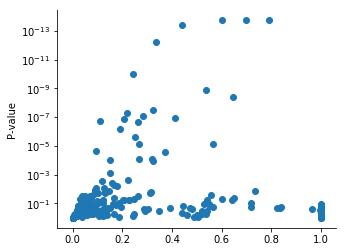

In [17]:
figsize(5, 4)
#plt.loglog()
plt.yscale('log')
plt.scatter(results.FSV, results.pval);
plt.gca().invert_yaxis();
#plt.xlabel('SNR')
plt.ylabel('P-value');

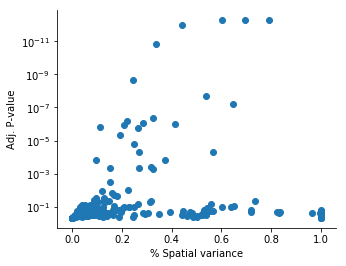

In [18]:
#plt.loglog()
plt.yscale('log')
plt.scatter(results.FSV, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('% Spatial variance')
plt.ylabel('Adj. P-value');

In [19]:
results.query('qval < 0.05').shape

(40, 18)

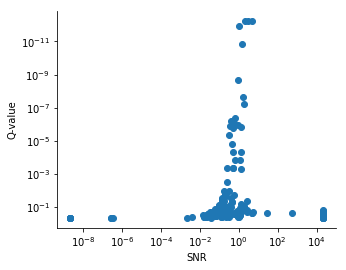

In [20]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

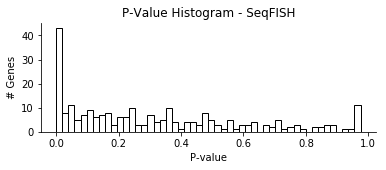

In [21]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=50, color='w', ec='k');
plt.title('P-Value Histogram - SeqFISH')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.savefig('seqfish-pval-histogram.pdf');

In [22]:
results.query('qval < 0.05').shape

(40, 18)

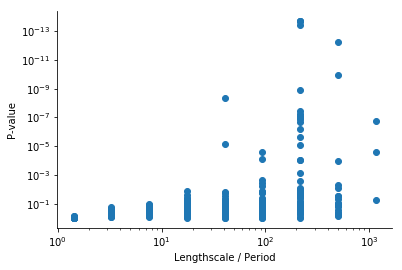

In [23]:
figsize(6, 4)
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

In [24]:
ms_results.model.value_counts()

SE        26
PER        9
linear     5
Name: model, dtype: int64

In [67]:
N = 5
top_per_ls = ms_results \
                  .query('g != "log_total_count"') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,FSV,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,...,n,s2_FSV,s2_logdelta,time,PER_prob,SE_prob,linear_prob,pval,qval,max_ll_null
14,530.050880,0.735059,6.100619,4,'Npas3',17.538077,0.360026,-253.927288,-4.174563,11.165831,...,257,0.013409,0.375758,0.000829,8.089799e-05,0.998627,1.291971e-03,1.351345e-02,4.361341e-02,-260.027907
16,565.537180,0.646029,34.519091,4,'sst',40.594851,0.541981,-271.670438,-3.640178,3.655643,...,257,0.000400,0.008626,0.000932,3.984597e-17,1.000000,1.936448e-26,4.220910e-09,6.235435e-08,-306.189529
17,288.223893,0.564428,20.187944,4,'gad1',40.594851,0.763344,-133.013794,-4.537315,4.892951,...,257,0.000865,0.016644,0.000807,5.605325e-05,0.998960,9.841948e-04,7.019392e-06,4.608692e-05,-153.201739
15,465.248631,0.316950,5.834021,4,'Zic3',40.594851,2.131727,-221.526163,-5.112102,4.650803,...,257,0.001315,0.030990,0.001145,2.274485e-03,0.995530,2.195170e-03,1.571915e-02,4.763379e-02,-227.360185
23,270.791100,0.373325,17.639135,4,'mfge8',93.963664,1.576211,-124.297398,-4.825784,1.515633,...,257,0.002234,0.046481,0.000806,4.112652e-07,1.000000,1.584414e-08,2.670364e-05,1.502802e-04,-141.936533
22,52.327256,0.317745,15.604897,4,'xdh',93.963664,2.016174,-15.065476,-2.793217,0.491465,...,257,0.001336,0.031409,0.000924,2.126456e-03,0.997857,1.622313e-05,7.805218e-05,4.192886e-04,-30.670373
20,491.982598,0.160420,8.339367,4,'Foxd3',93.963664,4.914311,-234.893147,-4.229639,0.949824,...,257,0.000900,0.047189,0.001344,8.427612e-05,0.999886,2.971021e-05,3.879510e-03,1.580992e-02,-243.232514
19,548.661831,0.178082,7.662816,4,'Zfp422',93.963664,4.333785,-263.232763,-4.264572,1.020769,...,257,0.001174,0.053294,0.001628,5.188998e-04,0.983396,1.608462e-02,5.637046e-03,2.149020e-02,-270.895579
18,506.631526,0.145599,6.108977,4,'Ets1',93.963664,5.510157,-242.217611,-5.206651,1.359838,...,257,0.001066,0.064237,0.003102,1.104406e-03,0.981838,1.705721e-02,1.344969e-02,4.361341e-02,-248.326588
34,118.280869,0.696463,91.202982,4,'myl14',217.494828,0.325094,-48.042282,-3.927013,0.550495,...,257,0.001588,0.038889,0.000929,2.107828e-12,1.000000,3.996405e-54,1.870726e-14,5.527144e-13,-139.245264


In [68]:
top_per_ls.shape

(28, 21)

In [69]:
import NaiveDE
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm, 'np.log(total_count)').T

In [70]:
top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]

8

In [71]:
model_colors = {'SE': 'C0', 'PER': 'C1', 'linear': 'C2'}

/Users/vale/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


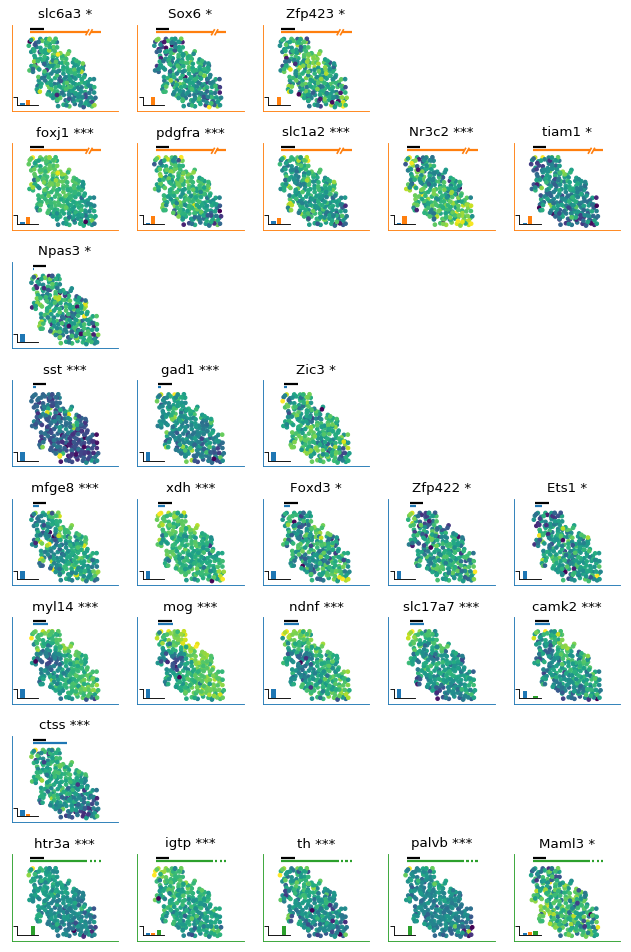

In [77]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]
for j, T in enumerate(top_per_ls.replace(np.nan, 0).groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.x, -sample_info.y, c=res[r['g']], s=10, rasterized=True);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'].replace("'", '') + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(150, 50, 250, lw=2)
        if 50 + r['l'] < 1100 and r['model'] != 'linear':
            plt.hlines(100, 50, 50 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
        else:
            if r['model'] != 'linear':
                plt.hlines(100, 50, 900, lw=2, color=model_colors[r['model']], zorder=0)
                plt.hlines(100, 950, 1100, lw=2, color=model_colors[r['model']], zorder=0)
                plt.plot([900 - 20, 900 + 20], [60, 130], lw=1.5, color=model_colors[r['model']], zorder=0)
                plt.plot([950 - 20, 950 + 20], [60, 130], lw=1.5, color=model_colors[r['model']], zorder=0)

            else:
                plt.hlines(100, 50, 900, lw=2, color=model_colors[r['model']], zorder=0)
                plt.hlines(100, 933, 966, lw=2, color=model_colors[r['model']], zorder=0)
                plt.hlines(100, 1000, 1033, lw=2, color=model_colors[r['model']], zorder=0)
                plt.hlines(100, 1066, 1100, lw=2, color=model_colors[r['model']], zorder=0)
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
        
        plt.axis('equal')
        
        ins_ax = inset_axes(ax, width='20%', height='10%', loc=3)
        plt.bar((1, 2, 3), top_per_ls.loc[idx][['SE_prob', 'PER_prob', 'linear_prob']], color=['C0', 'C1', 'C2'])
        plt.ylim(0, 1);
        plt.xticks([], [])
        plt.xlim(-0.0, 4)
        plt.yticks([1], ['']);
    
plt.tight_layout()
plt.savefig('top_SF_genes_per_ls.pdf', bbox_inches='tight')

In [31]:
N = 3
top_per_ls = ms_results \
                  .query('g != "log_total_count"') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

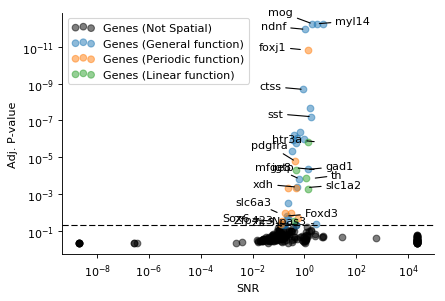

In [32]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Not Spatial)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(1. / tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (General function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic function)', marker='o', color='C1');

tmp = ms_results.query('model == "linear"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Linear function)', marker='o', color='C2');

x_offsets = {"'slc1a2'": 5e0,
             "'gad1'": 5,
             "'Sox6'": 1e-2,
             "'Foxd3'": 5,
             "'myl14'": 5,
            "'th'": 5}
y_offsets = {"'slc6a3'": 3e0,
             "'pdgfra'": 5,
             "'mfge8'": 3,
             "'mog'": 3}
for i, r in top_per_ls.iterrows():
    xy = (1. / r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})


plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_SF.pdf', bbox_inches='tight');

In [33]:
import SpatialDE.plot

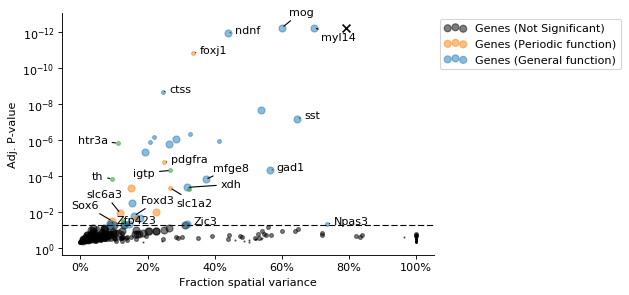

In [34]:
plt.figure(figsize=(6, 4), dpi=80)

plt.yscale('log')

SpatialDE.plot.FSV_sig(results, ms_results)

x_offsets = {}
x_offsets = {"'htr3a'": -0.12,
             "'th'": -0.06,
             "'Sox6'": -0.12,
             "'Foxd3'": 2e-2,
             "'myl14'": 2e-2,
             "'slc6a3'": -0.1,
             "'xdh'": 0.1,
             "'igtp'": -0.11}
y_offsets = {"'slc6a3'": 8e0,
             "'pdgfra'": 1,
             "'mfge8'": 3,
             "'mog'": 5,
             "'Sox6'": 5,
             "'Foxd3'": 5,
             "'myl14'": 2e-1,
             "'slc1a2'": 1e-1,
             "'igtp'": 5e-1}

tmp = results.query('g in @top_per_ls.g')
for i, r in tmp.iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})

plt.savefig('FSV_SF_pval.pdf', bbox_inches='tight')

In [45]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

/Users/vale/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


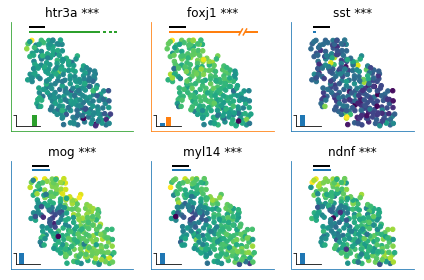

In [78]:
figsize(6, 4)
N = 3
N_rows = 2
gene_sel = ["'mog'", "'myl14'", "'ndnf'", "'foxj1'", "'sst'", "'htr3a'"]
select_genes = ms_results.query('g in @gene_sel')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    ax = plt.subplot(N_rows, N, i + 1)

    plt.scatter(sample_info.x, -sample_info.y, c=res[r['g']], s=20, rasterized=True);

    s = ' *'
    if r['qval'] < 0.01:
        s = ' **'

    if r['qval'] < 0.001:
        s = ' ***'

    plt.title(r['g'].replace("'", '') + s)

    plt.xticks([])
    plt.yticks([])
    plt.hlines(150, 50, 250, lw=2)
    if 50 + r['l'] < 1100 and r['model'] != 'linear':
        plt.hlines(100, 50, 50 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
    else:
        if r['model'] != 'linear':
            plt.hlines(100, 50, 900, lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(100, 950, 1100, lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([900 - 20, 900 + 20], [60, 130], lw=1.5, color=model_colors[r['model']], zorder=0)
            plt.plot([950 - 20, 950 + 20], [60, 130], lw=1.5, color=model_colors[r['model']], zorder=0)
            
        else:
            plt.hlines(100, 50, 900, lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(100, 933, 966, lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(100, 1000, 1033, lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(100, 1066, 1100, lw=2, color=model_colors[r['model']], zorder=0)

    for spine in ax.spines.values():
        spine.set_edgecolor(model_colors[r['model']])

    plt.axis('equal')
    
    # Make insert with model probabilities
    ins_ax = inset_axes(ax, width='20%', height='10%', loc=3)
    plt.bar((1, 2, 3), select_genes.loc[idx][['SE_prob', 'PER_prob', 'linear_prob']], color=['C0', 'C1', 'C2'])
    plt.ylim(0, 1);
    plt.xticks([], [])
    plt.xlim(-0.0, 4)
    plt.yticks([1], ['']);

plt.tight_layout()
plt.savefig('SF_select_genes.pdf', bbox_inches='tight')